<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="220"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="250"/>  

# <center>Programming for Data Analysis 2019 Project: Simulating Real World Data</center>  #

***
**Module Name**: Programming for Data Analysis  
**Module Number**: 52465  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

**Problem statement**  
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.  

We suggest you use the numpy.random package for this purpose.  

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.  
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.  

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. 

# Table of Contents #
1. [Introduction](#intro)  
2. [Dataset](#dataset)  
2.1 [Cell Line](#cell_line)  
2.2 [Bioreactor Size](#brSize)  
2.3 [Average Temperature](#temp)  
2.4 [Dissolved Oxygen](#do)  
2.5 [Peak Viable Cell Density](#cell_dens)  
2.6 [Hours pre-production bioreactor](#hours)  
2.7 [Culture type](#culture)  
2.8 [No of alarms](#alarms)  
2.9 [Media type](#media)  
2.10 [Yield](#yield)  
2.11 [Net worth of batch](#worth)
3. [Finishing Off the Dataset](#finish)
4. [Describe New Dataset](#describe)
5. [Conclusion](#conclusion)
6. [References](#refs)

 ## <a name="intro"></a>1. Introduction ## 
For my data simulation project I have chosen the production of biopharmaceuticals products, in particular monoclonal antibodies (mAbs). Naturally occurring antibodies are produced in the body as part of our immunological defence systems. Whenever we get a cough or cold, or indeed anything more serious, our bodies will produce antibodies to target whatever is causing the illness. This may be a bacterium, _e.g._ Strep throat caused by _Streptococcus pyogenes_, a virus, in the case of a cold or flu, some foreign matter _e.g._ pollen which will result in hayfever or even the bodies own cells when they   become aged or damaged.   Because antibodies may be made to combat any substance that enters the body, they make ideal candidates to harness for therapeutic purposes.  

When the body comes under attack by a substance called a pathogen, for example the common cold, special cells in the body will make antibodies to try and overcome this pathogen. In many cases this happens very successfully and we never even knew we fighting off the infection. Each of these special cells will make their own version of an antibody in the hope that one of them will be successful in overcoming the invader. The body monitors which ones are successful and subsequently  increase the production of the best fit antibody. 

To make a biopharmaceutical a single cell that is good at producing the antibody required is cloned repeatedly. This cloned cell is grown in a vessel called a bioreactor and encouraged to produce the antibody. The contents of the bioreactor are then removed, the antibody extracted and purified to produce the final biopharmaceutical product.  

The data I have initially chosen to simulate for this project are:  

* Cell line
* Bioreactor Size  
* Average Temperature   
* Dissolved Oxygen  
* Peak Viable Cell Density  
* Hours pre-production bioreactor  
* Culture type  
* No of alarms  
* Media type  
* Yield  
* Net worth of batch  

## 2. <a name="dataset"></a>The Dataset

Of all the parameters I have chosen, the most influential of all is the cell type. There are three possible cell types and as almost every variable is dependent on the kind of cells used, the plan is to create three minidatasets which I will combine at the end. Each of these dataset will be 100 rows long.  

To achieve this we must first import the python packages we need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting and as a basis for seaborn
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 6] # Setting the plot size

### <a name="cell_line"></a>2.1 Cell Line 
This is the type of used to produce the antibody. While there are many types of cells utilised in biopharmaceutical production, for the purposes of this project I am ploying categorical data. The cell type may be -
* Microbial cells (_e.g. E. coli._) - being unicellular, these cells are the easiest to grow, but can only produce basic proteins.  
* Mammalian cell (_e.g._ CHO) - Chinese Hamster Ovary cells are frequently used in biopharmaceutical processing. They can produce complicated proteins but are harder to grow in vitro. Mammalian cells are used to being part of a larger organism that has specialised organs to look after for example waste disposal _etc._. They also rely on other organs for physical protection and anchorage _e.g._ bones and skin. Mammalian cells do not adapt well to being on their own in a bioreactor and as a result will grow much slower and be more susceptible to damage than microbial cells.  
* Humanised CHOs - As the body recognises CHO-produced proteins as non-human, they elicit an immune response. CHOS may be genetically manipulated to become humanised. These CHOs produce more human like proteins which are better accepted by the body. This genetic manipulation further destabilises the cells however, making them more difficult again to grow.  

This is a really important feature as many of the following attributes depend on the cell type. In general, the microbial cell line is more robust, mammalian (CHO) less so, and to a lesser extent the mammalian producing humanised protein even less so. For now, I will evenly split the sample size into three and assume there are equal number of each.

In [2]:
data = ["Microbial"]*100
dfMicro = pd.DataFrame(data, columns = ['cell_line']) 
data = ["CHO"]*100
dfMam = pd.DataFrame(data, columns = ['cell_line']) 
data = ["vCHO"]*100
dfHum = pd.DataFrame(data, columns = ['cell_line']) 

### <a name= brSize></a>2.2 Size of bioreactor
THe size of the bioreactor The larger the bioreactor, the greater the amount of product produced. It takes more time for the cells to acclimatise to the bioreactor, particularly the mammalian cells (CHO and humanised CHO). For the purposes of the data simulation it is assumed there will be a uniform distribution of the bioreator sizes.


(array([13., 13., 14., 10.,  6., 10.,  5.,  6., 16.,  7.]),
 array([ 500., 1440., 2380., 3320., 4260., 5200., 6140., 7080., 8020.,
        8960., 9900.]),
 <a list of 10 Patch objects>)

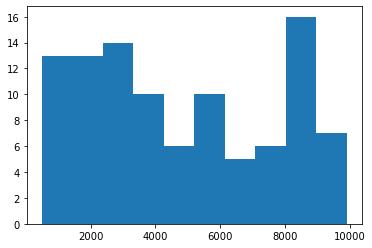

In [3]:
# Start with Bioreactor Size
# This will be a uniformly distributed range of sizes from 500L to 10000L 
brSize = 100 * np.random.randint(5, 100, 100)
plt.hist(brSize)

### <a name="temp"></a>2.3 Average Temperature Reading  
There are a number of parameters that are controlled and monitored as part of the cultivation of cells. One such parameter is the temperature. This is controlled via a control system (DCS - Distributed Control System, or PLC - Programmable Logic Controller). While the temperature is monitored and controlled throughout its cultivation time, it is taken for this dataset to be the mean throughout the process. This will be simulated to be a normal distributed attribute. THe microbial cell lines have a good tolerance for temperature, while the mammalian cells do not. Mammalian cells are used to specific organs controlling the temperature of the body, _e.g._ blood, skin, kidneys _etc._ and have no cellular mechanism to do so on its own. As a result mammalian cells are much more susceptible to temperature fluctuations.  

### <a name="do"></a>2.4 Dissolved Oxygen  
Like the average temperature reading, the dissolved oxygen (DO) is continuously monitored throughout the process by the control system and the mean value simulated here. Again like the temperature, the microbial cells are easier to adapt to non-optimal DO levels.  

To make things more interesting, we are going to make a huge leap here and say that if the DO is too high, it is a sign that air was too vigorously sparged through the bioreactor which would result in cell lysis (breaking apart - death). This is a true phenomenon, but increased O2 levels could also be due to factors other than sparging as well. 

### <a name="cell_dens"> </a> 2.5 Peak Viable Cell Density  
This is the maximum live cell density in g/l. Outside of other factors this could be assumed to be normally distributed. 

### <a name="hours"></a>2.6 Hours Pre-Bioreactor
Student T-Test distribution dependent on: 
* cell type, with mammalian cells requiring longer to grow.
* size of bioreactor - need an optimal cell density to see the bioreactor. Too few cells in a large volume would equate to a longer total processing time.


### <a name="culture"></a> 2.7 Culture Type  
The type of processing may be   
* Batch  
* Fed batch  
* Perfusion  

In the order given each type has longer processing times, has an increased yield and may have a small bioreactor volume in the case of perfusion method. For the purposes of data simulation, this is categorical data.

### <a name="alarms"></a> 2.8  No of Alarms  
The production process is monitored and controlled by an automated control system. This control system will alarm if various parameters fall outside of the acceptable limits. It is a reasonable assumption that the greater the number of alarms during proccessing would have an adverse effect on the yield. From a data simulation perspective, this would be a Poisson distribution of events during the cell growth.  

### <a name="media"></a> 2.9 Media Type  
Cateorical data.  
* Serum Free  
* Serum based  

### <a name="yield"></a> 2.10 Yield  
g of product. Based on all above data

### <a name="worth"></a>2.11 Net Worth of Batch  
Uniform Distribution multiplier on yield with influence of cell type.

## <a name="finish"></a>3. Finishing Off the Dataset

In [4]:
# Code to mix up the dataframe
#df = df.sample(frac=1).reset_index(drop=True)

## <a name="describe"></a>4. Describe New Dataset  


## <a name="conclusion"></a>5. Conclusion

## <a name="refs"></a>6. References ##
1. [NumPy Site](http://www.numpy.org/)
2. [Project Jupyter](http://jupyter.org/)  